In [2]:
import sys
sys.path.append("../")
from GeoToolkit.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator

import numpy as np

C:\Users\aleow\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
download = DataIO.fetchData(path="./assets", localCloud='Local')
display(download)

interactive(children=(RadioButtons(description='File Type:', options=('Local', 'Cloud'), value='Local'), Text(…

In [5]:
selection = Simulator.setDataExtentWidget(download.result[0])
display(selection)

interactive(children=(FloatSlider(value=4.963277472299524, continuous_update=False, description='East', max=12…

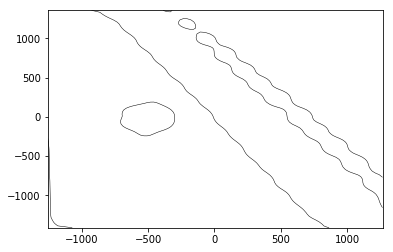

In [6]:
grid = download.result[0]
tilt = grid.tiltAngle

contours = [0]
# Contour the zero and keep
axs = plt.subplot()
CS = axs.contour(
            grid.hx, grid.hy, tilt, len(contours), levels=contours,
            colors='k', linewidths=0.5
        )


In [7]:
Simulator.gridFiltersWidget(grid)

In [8]:
# Create a new grid with the tilt as property
gridTilt = DataIO.dataGrid()
gridTilt._values = tilt
gridTilt.limits = grid.limits
gridTilt.nx, gridTilt.ny = grid.nx, grid.ny
gridTilt.dx, gridTilt.dy = grid.dx, grid.dy
gridTilt.x0, gridTilt.y0 = grid.x0, grid.y0

In [9]:
selection = Simulator.setDataExtentWidget(gridTilt)
display(selection)

interactive(children=(FloatSlider(value=4.963277472299524, continuous_update=False, description='East', max=12…

C:\Users\aleow\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


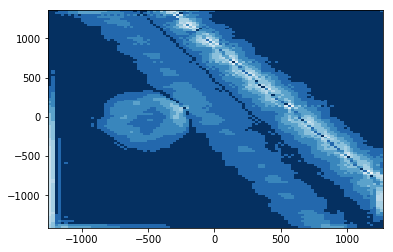

In [10]:
axs = plt.subplot()
out = Simulator.plotDataHillside(gridTilt.hx, gridTilt.hy, gridTilt.totalHorizontal, alpha=1, alphaHS=0.5)


In [11]:
tri2D = Delaunay(gridTilt.gridCC[:, :2])
F = LinearNDInterpolator(tri2D, gridTilt.totalHorizontal.flatten(order='F'))                           
contour=[]        
estimated_z = []

for segs, level in zip(CS.allsegs, CS.levels):

    for poly in segs:
        
        
        z = 1./F(poly[:, 0], poly[:, 1])
        
        estimated_z += [z]
        contour += [poly]

                
                

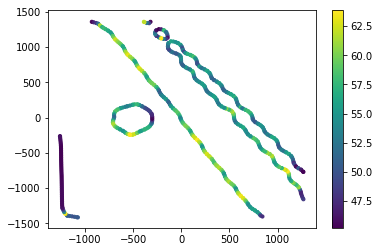

In [12]:
axs = plt.subplot()

for loc,depth in zip(contour,estimated_z):
    plt.scatter(loc[:, 0], loc[:, 1], 10, depth, )
    
plt.colorbar()




In [13]:
grid.dx #check grid spacing



25.0

In [14]:
Simulator.gridTilt2Depth(grid)






In [34]:
max(dist)

NameError: name 'dist' is not defined